# Rapport d'analyse sur les consommations en Elec et Gaz

Année – Filière – code département – Libellé Département – Libellé Région – ID Filière (100 Elec et 200 Gaz) – Conso Totale - (AGRICULTURE, Tertiaire, Industrie, Résidentiel) - consommation agriculture (MWh) – Les points de livraison Agriculture – Pourcentage agri conso à l’année


### QUESTIONS
 
Evolution de la consommation dans le temps sur chaque secteur. <br>
Comparaison du monde « PRO » et « RESIDENTIEL » sur les trois sujets <br>
Cartographie rapport GAZ/ELEC + Opérateur


- Vérifier les NaN - OK
- Vérifier les duplicata - OK
- Vérifier les types de données - OK
- Supprimer les colonnes inutiles - OK
- Détecter les Outliers
- Normaliser les caractères


In [17]:
#import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("conso-elec-gaz-annuelle-par-secteur-dactivite-agregee-departement.csv",sep = ";")

In [2]:

'''
DATABASE :
operateur = fournisseur = str
annee = date = date
filiere = gaz/electricité = str
conso agriculture = float
points libraison = int
indice qualite = int

code_departement => str
libelle_departement => str
code_region = code region => str
libelle_region = nom de region => str
id_filiere = 100:elec ; 200:gaz => string
geom = 
consototale = float

'''

print(df.dtypes)
print("##################")
print(df.shape)
print("##################")
print("donnees dupliquées: \n", df.duplicated().value_counts())
print("##################")
print(df.isna().value_counts())  # pas de Na à priori
print("##################")
df["Indique qualité Agriculture"] = df["Indique qualité Agriculture"].replace("Indique qualité Agriculture",
                                                                              "Pourcentage_annuel_agriculture")
''''
CLEANING
1. vérification du type des variables 
2. observation des NA
3. analyse des données
'''



Opérateur                                           object
Année                                                int64
Filière                                             object
Consommation Agriculture (MWh)                     float64
Nombre de points Agriculture                         int64
Nombre de mailles secretisées (agriculture)          int64
Indique qualité Agriculture                        float64
Consommation Industrie (MWh)                       float64
Nombre de points Industrie                           int64
Nombre de mailles secretisées (industrie)            int64
Indice qualité Industrie                           float64
Consommation Tertiaire  (MWh)                      float64
Nombre de points Tertiaire                           int64
Nombre de mailles secretisées (tertiaire)            int64
Indice qualité Tertiaire                           float64
Consommation Résidentiel  (MWh)                    float64
Nombre de points Résidentiel                         int

"'\nCLEANING\n1. vérification du type des variables \n2. observation des NA\n3. analyse des données\n"

#### Suppression des colonnes inutiles

In [27]:
asupprimer = [0,5,9,13,17,19,20,21,22,25,28]
asupprimer

[0, 5, 9, 13, 17, 19, 20, 21, 22, 25, 28]

In [31]:
df = df.drop(df.columns[asupprimer], axis=1)

In [46]:
df = df.rename(columns = {"Opérateur":"Operateur"})
df = df.rename(columns = {"Année":"Annee"})
df = df.rename(columns = {"Filière":"Filiere"})
df = df.rename(columns = {"Consommation Agriculture (MWh)":"Conso_agri"})
df = df.rename(columns = {"Nombre de points Agriculture":"Pts_agri"})
df = df.rename(columns ={"Indique qualité Agriculture":"Indice_agri"})

df = df.rename(columns = {"Consommation Industrie (MWh)":"Conso_industrie"})
df = df.rename(columns = {"Nombre de points Industrie":"Pts_industrie"})
df = df.rename(columns = {"Indice qualité Industrie":"Indice_industrie"})

df = df.rename(columns = {"Consommation Tertiaire  (MWh)":"Conso_tertiaire"})
df = df.rename(columns = {"Nombre de points Tertiaire":"Pts_tertiaire"})
df = df.rename(columns = {"Indice qualité Tertiaire":"Indice_tertiaire"})

df = df.rename(columns = {"Consommation Résidentiel  (MWh)":"Conso_resident"})
df = df.rename(columns = {"Nombre de points Résidentiel":"Pts_resident"})
df = df.rename(columns = {"Indice qualité Résidentiel":"Indice_resident"})

df = df.rename(columns = {"Code Département":"Departement_code"})
df = df.rename(columns = {"Libellé Département":"Departement_libelle"})
df = df.rename(columns = {"Code Région":"Region_code"})
df = df.rename(columns = {"Libellé Région":"Region_libelle"})
df = df.rename(columns = {"Consommation totale (MWh)":"Conso_totale"})

In [47]:
df.head()

,Annee,Filiere,Conso_agri,Pts_agri,Indice_agri,Conso_industrie,Pts_industrie,Indice_industrie,Conso_tertiaire,Pts_tertiaire,Indice_tertiaire,Conso_resident,Pts_resident,Indice_resident,Departement_code,Departement_libelle,Region_libelle,id_filiere,Conso_totale
0,2011,Electricité,26490.69,334,0.957,838010.71,633,0.959,515742.32,2069,0.938,1472026.60,259239,0.301,02,Aisne,Hauts-de-France,100,2855280.66
1,2011,Electricité,25747.90,373,0.976,426364.02,553,0.954,430434.21,1813,0.935,1130822.23,219826,0.285,03,Allier,Auvergne-Rhône-Alpes,100,2017190.64
2,2011,Electricité,13601.05,118,0.946,105074.61,252,0.923,250012.20,1323,0.924,685956.96,131064,0.322,04,Alpes-de-Haute-Provence,Provence-Alpes-Côte d'Azur,100,1055358.03
3,2011,Electricité,6611.47,62,0.949,44404.66,213,0.944,323814.05,1984,0.923,561238.84,123947,0.311,05,Hautes-Alpes,Provence-Alpes-Côte d'Azur,100,937412.37
4,2011,Electricité,33909.59,288,0.944,524680.83,561,0.959,374681.45,1551,0.936,962384.81,169748,0.298,10,Aube,Grand Est,100,1897584.71


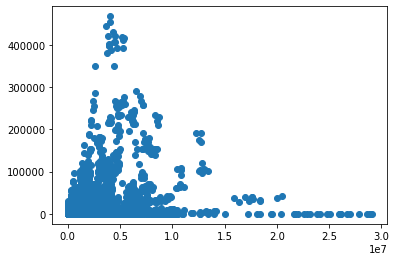

In [48]:
plt.scatter("Conso_totale","Conso_agri", data = df)

Pas de Outliers

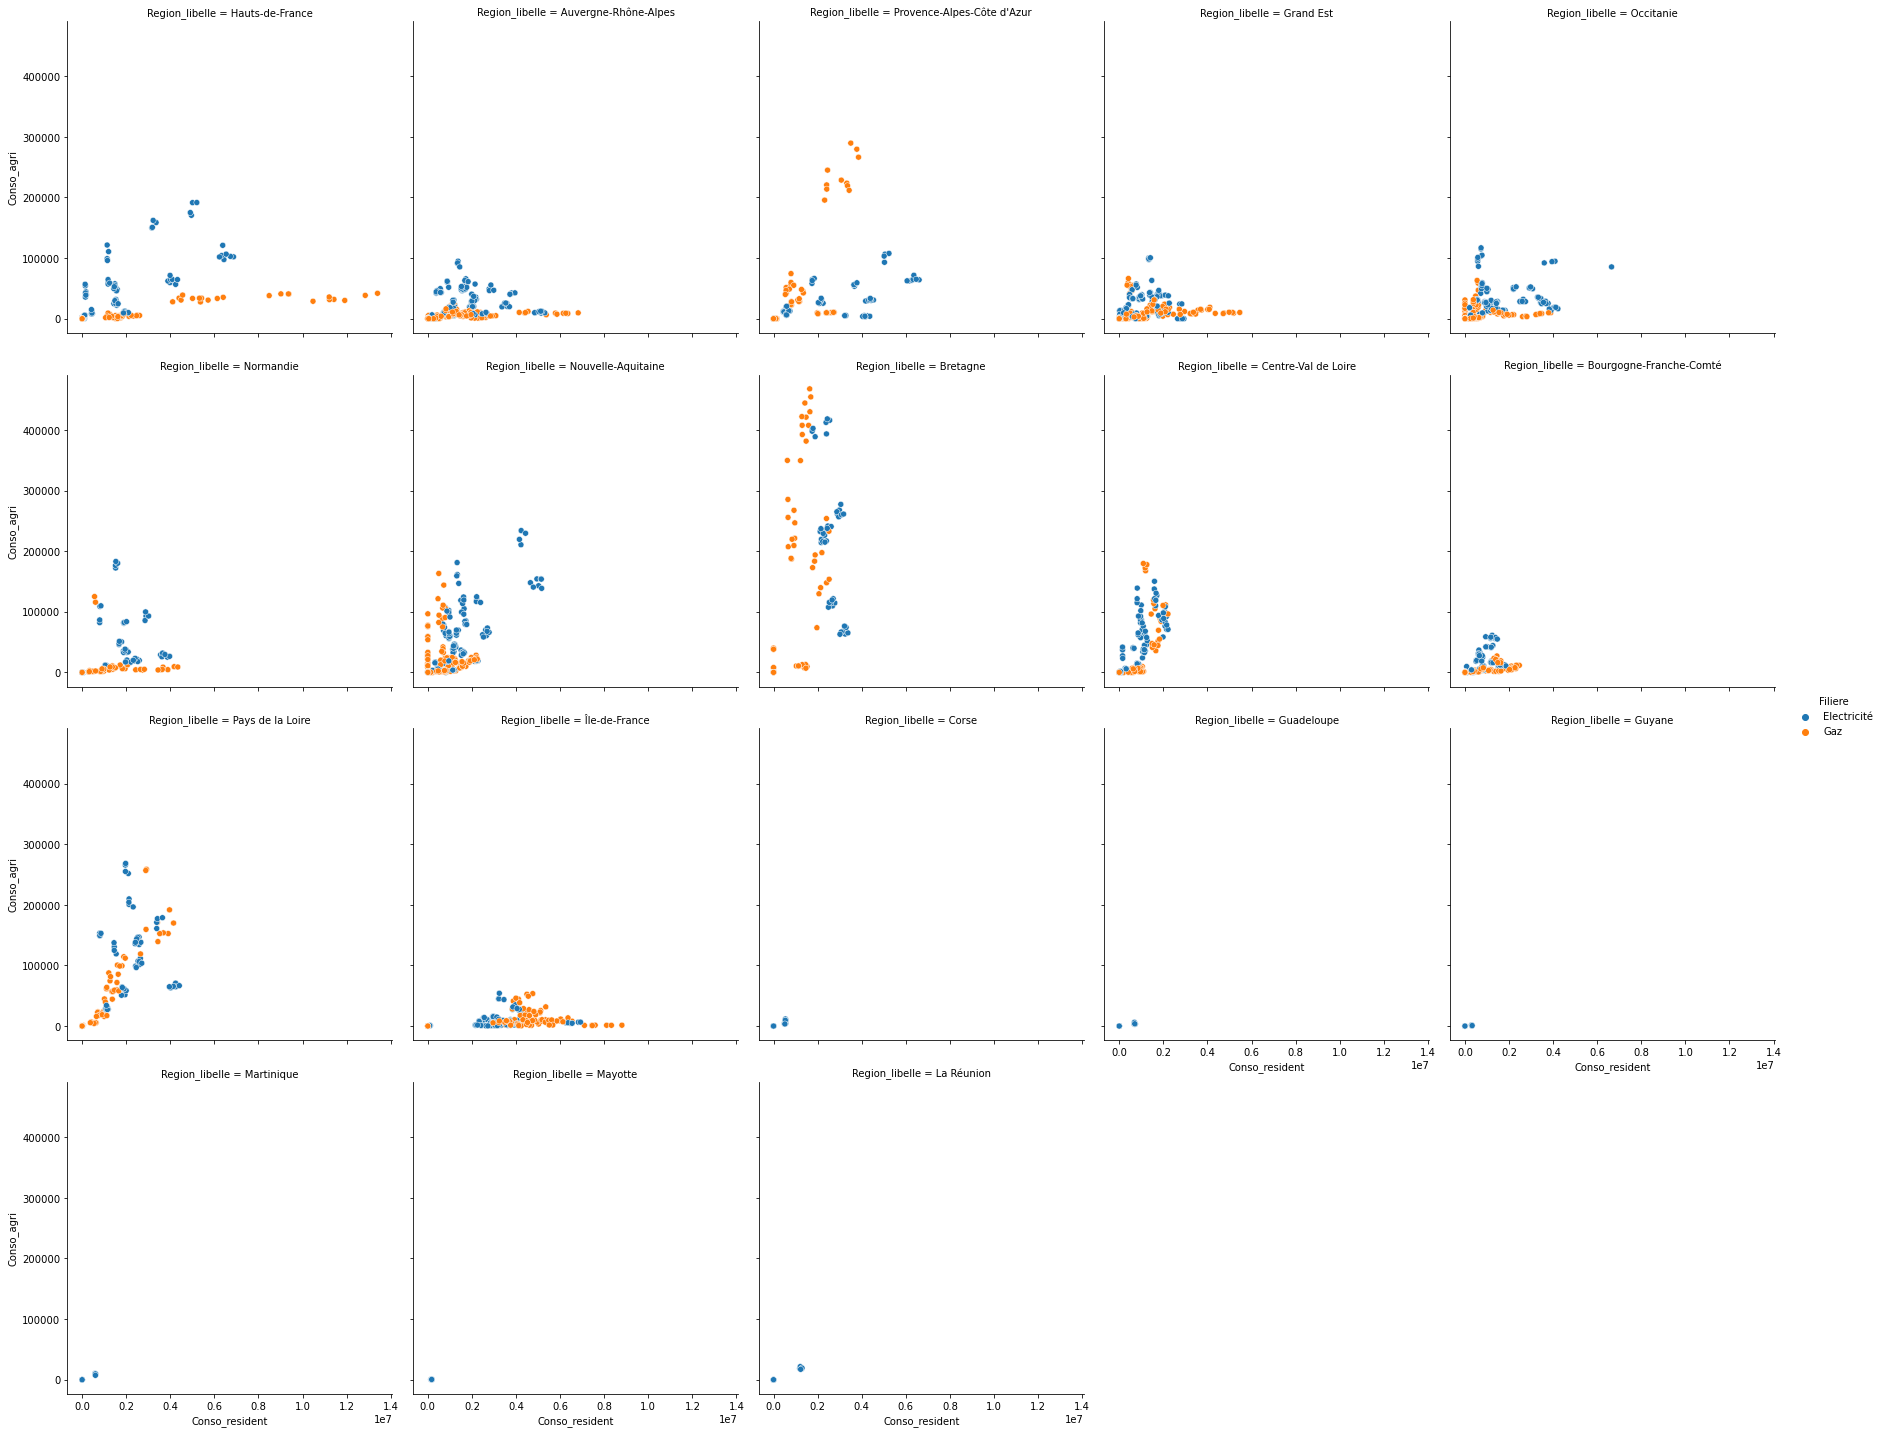

In [49]:
sns.relplot(
    data=df,
    x="Conso_resident", y="Conso_agri", hue="Filiere", col="Region_libelle",col_wrap=5,
)

<Figure size 1440x1440 with 0 Axes>

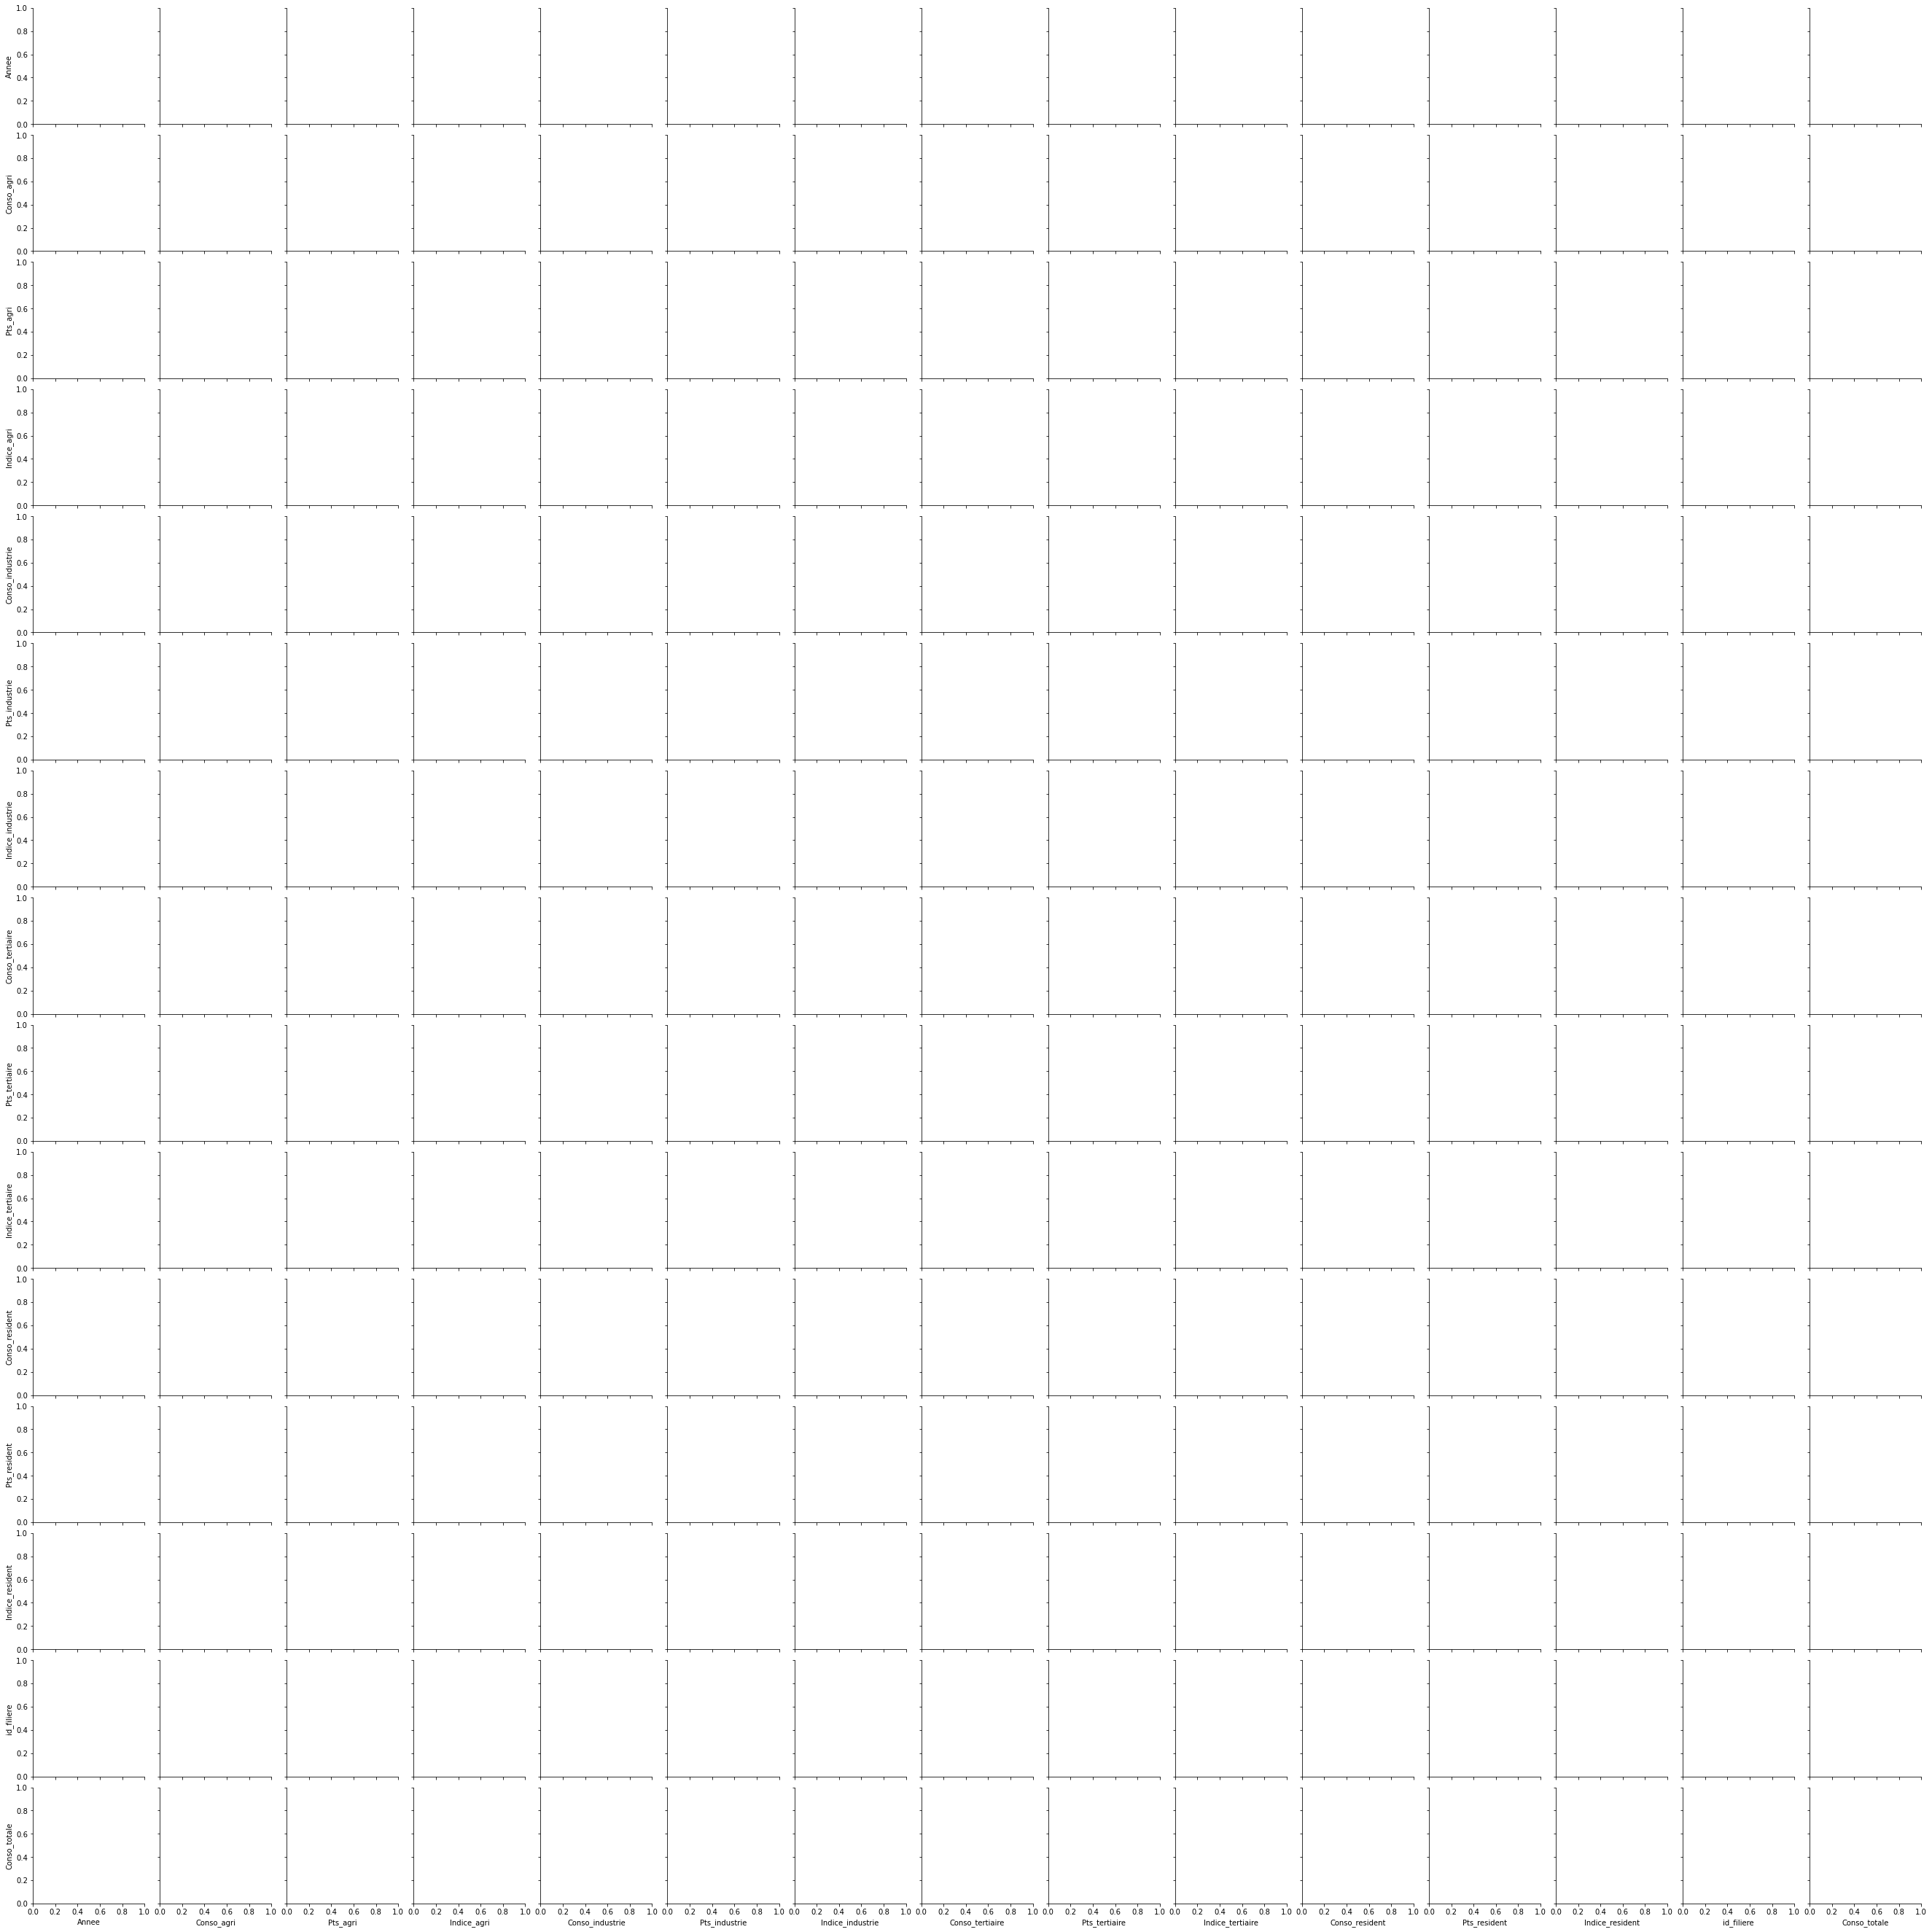

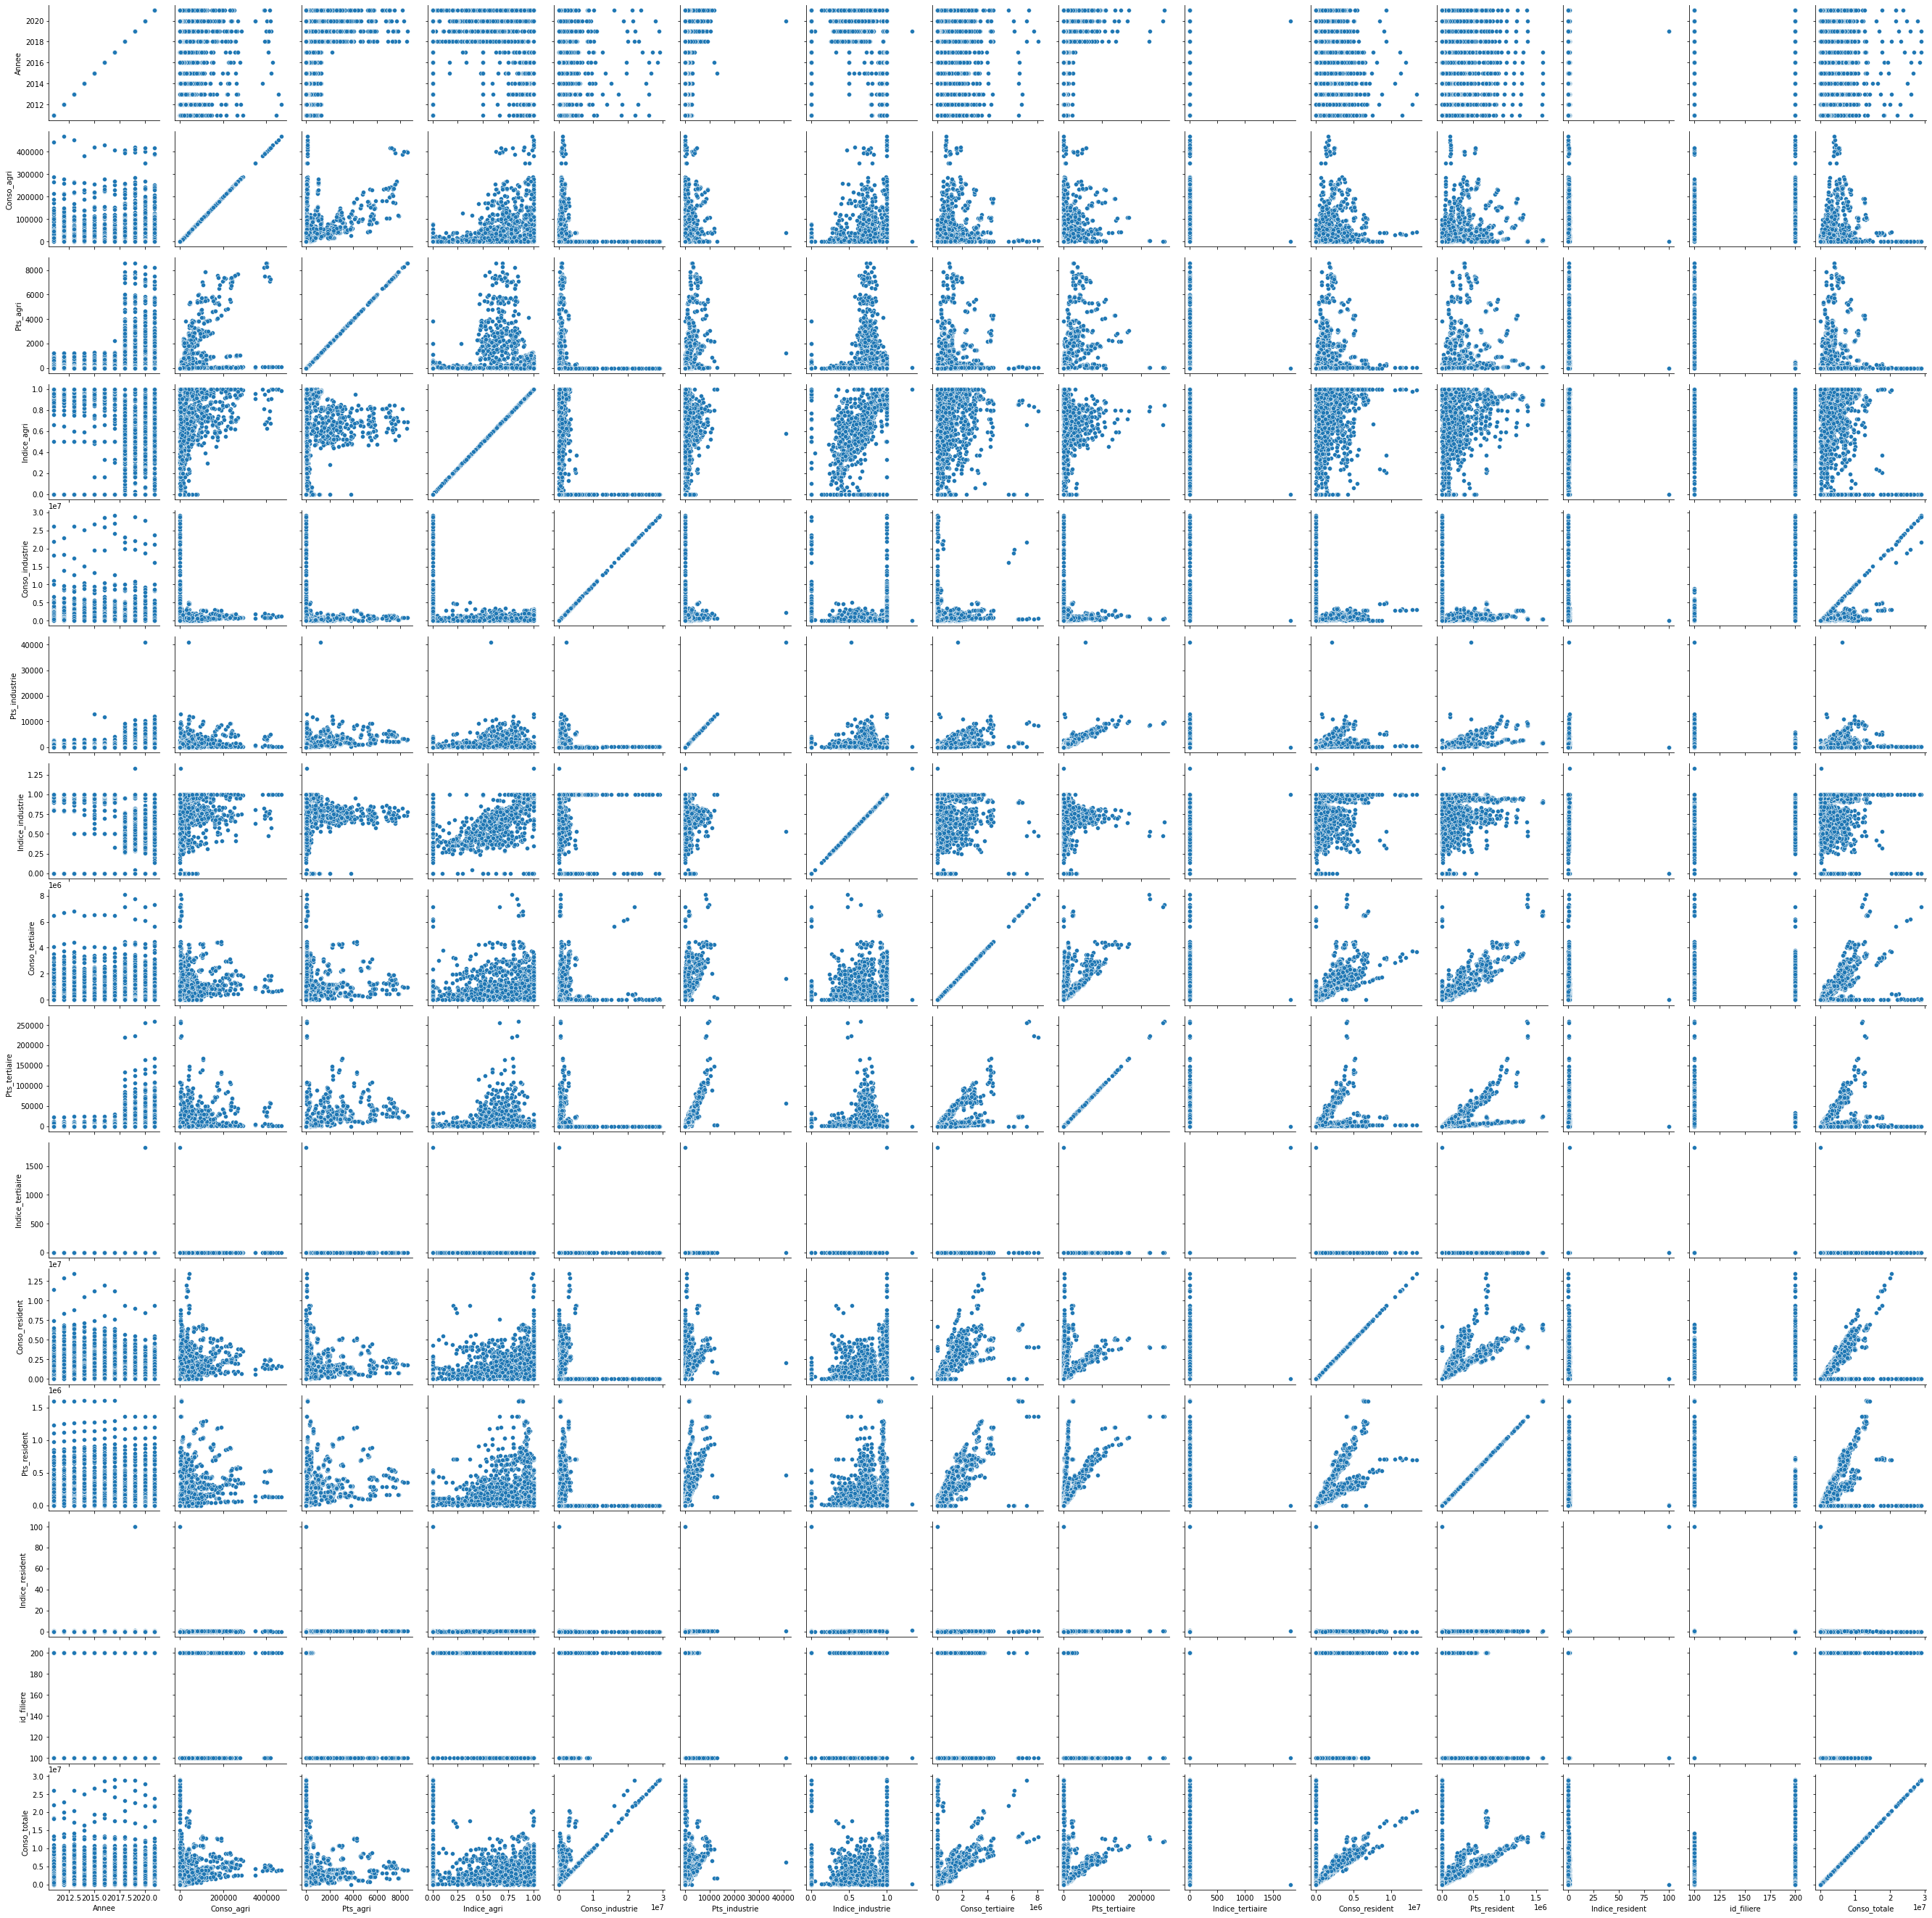

In [54]:
plt.figure(figsize=[20, 20])

g = sns.PairGrid(df)
g = sns.PairGrid(df)
g.map(sns.scatterplot)
plt.savefig("interaction_toutes_variables2.png")